In [1]:
import numpy as np
import geopandas as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

L'objectif de notre étude est d'établir si il existe une corrélation voire une causalité entre encadrement des loyers et évolution des prix de l'immobilier. 
--> mettre des dates clés sur les lois qui sont passées, ça peut être une bonne accroche.

Importation des données à partir de l'API, faire un paragraphe sur comment on importe les données et tout


In [2]:
import pandas as pd
import geopandas as gpd
import requests

def importation_donnees_api(annee, code_insee):
    """
    Importation des données DVF pour une année et un code INSEE donné via l'API Cerema.
    
    Paramètres :
        - annee (int) : Année des données (exemple : 2020).
        - code_insee (str) : Code INSEE de la commune (exemple : "33063" pour Paris).
        
    Retour :
        - GeoDataFrame (gpd.GeoDataFrame) : Données géographiques si coordonnées présentes.
        - DataFrame (pd.DataFrame) : Données tabulaires si absence de coordonnées.
    """
    try:
        # Construction de l'URL
        url = f"https://apidf-preprod.cerema.fr/dvf_opendata/geomutations/?anneemut={annee}&code_insee={code_insee}"
        
        # Requête API
        response = requests.get(url)
        response.raise_for_status()  # Vérifie les erreurs HTTP
        
        # Chargement des données en JSON
        data = response.json()
        
        # Normalisation en DataFrame
        df = pd.json_normalize(data.get("results", data.get("features", [])))
        
        # Vérification des coordonnées géographiques
        if "longitude" in df.columns and "latitude" in df.columns:
            return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
        else:
            print("Coordonnées géographiques absentes dans les données.")
            return df  # Retourne un DataFrame classique
        
    except Exception as e:
        print(f"Erreur lors de l'importation : {e}")
        return None

# Exemple d'utilisation
dvf_data = importation_donnees_api(2020, "33063")  # Bordeaux, année 2020

# Vérification des données
if dvf_data is not None:
    print(dvf_data.head())



Coordonnées géographiques absentes dans les données.
        id     type geometry.type  \
0  3855638  Feature  MultiPolygon   
1  3855640  Feature  MultiPolygon   
2  3855642  Feature  MultiPolygon   
3  3855645  Feature  MultiPolygon   
4  3855649  Feature  MultiPolygon   

                                geometry.coordinates  \
0  [[[[-0.570503, 44.82924], [-0.570422, 44.82923...   
1  [[[[-0.551803, 44.86352], [-0.551838, 44.86365...   
2  [[[[-0.609557, 44.843201], [-0.609284, 44.8431...   
3  [[[[-0.550365, 44.837265], [-0.550277, 44.8367...   
4  [[[[-0.608852, 44.856038], [-0.608834, 44.8560...   

              properties.idmutinvar             properties.idopendata  \
0  284218cea55e312f042c2c75a697c1f2  284218cea55e312f042c2c75a697c1f2   
1  f6ce8892fb9bf02146d1080d3bb17fe8  f6ce8892fb9bf02146d1080d3bb17fe8   
2  fda8b5a79706c41c15ce0c57f05b4245  fda8b5a79706c41c15ce0c57f05b4245   
3  15426937ee71be3d0ad89c8c5edf72c8  15426937ee71be3d0ad89c8c5edf72c8   
4  29f7b3b2c7e64a38178

D'abord, je regarde le type des données, et les premières lignes pour examiner la structure des données

In [3]:

print("Colonnes disponibles dans les données :")
print(dvf_data.columns)
print("Aperçu des données :")
print(dvf_data.head())


Colonnes disponibles dans les données :
Index(['id', 'type', 'geometry.type', 'geometry.coordinates',
       'properties.idmutinvar', 'properties.idopendata', 'properties.datemut',
       'properties.anneemut', 'properties.coddep', 'properties.libnatmut',
       'properties.vefa', 'properties.valeurfonc', 'properties.nbcomm',
       'properties.l_codinsee', 'properties.nbpar', 'properties.l_idpar',
       'properties.nbparmut', 'properties.l_idparmut', 'properties.sterr',
       'properties.nbvolmut', 'properties.nblocmut', 'properties.l_idlocmut',
       'properties.sbati', 'properties.codtypbien', 'properties.libtypbien'],
      dtype='object')
Aperçu des données :
        id     type geometry.type  \
0  3855638  Feature  MultiPolygon   
1  3855640  Feature  MultiPolygon   
2  3855642  Feature  MultiPolygon   
3  3855645  Feature  MultiPolygon   
4  3855649  Feature  MultiPolygon   

                                geometry.coordinates  \
0  [[[[-0.570503, 44.82924], [-0.570422, 44.8

On veut regarder l'évolution des prix de l'immobilier suite à l'encadrement des loyers donc on combine toutes les années dans un seul dataframe. D'abord je regarde pour la ville de Bordeaux, où l'encadrement des loyers a été appliqué en 2022

In [4]:
data_frames = []
for year in [2018, 2019, 2020, 2021, 2022, 2023]:
    print(f"Récupération des données pour l'année {year}...")
    df = importation_donnees_api(year, "33063")  # Bordeaux (code INSEE : 33063)
    if df is not None:
        df["properties.anneemut"] = year  
        data_frames.append(df)

# Combiner toutes les années en un seul DataFrame
dvf_data_all_years = pd.concat(data_frames, ignore_index=True)

# Vérifier les données combinées
print("Données combinées pour toutes les années :")
print(dvf_data_all_years["properties.anneemut"].value_counts())  # Nombre de transactions par année


Récupération des données pour l'année 2018...
Coordonnées géographiques absentes dans les données.
Récupération des données pour l'année 2019...
Coordonnées géographiques absentes dans les données.
Récupération des données pour l'année 2020...
Coordonnées géographiques absentes dans les données.
Récupération des données pour l'année 2021...
Coordonnées géographiques absentes dans les données.
Récupération des données pour l'année 2022...
Coordonnées géographiques absentes dans les données.
Récupération des données pour l'année 2023...
Coordonnées géographiques absentes dans les données.
Données combinées pour toutes les années :
properties.anneemut
2018    100
2019    100
2020    100
2021    100
2022    100
2023    100
Name: count, dtype: int64


Petit check du dataframe

In [33]:
dvf_data_all_years

,id,type,geometry.type,geometry.coordinates,properties.idmutinvar,properties.idopendata,properties.datemut,properties.anneemut,properties.coddep,properties.libnatmut,...,properties.l_idpar,properties.nbparmut,properties.l_idparmut,properties.sterr,properties.nbvolmut,properties.nblocmut,properties.l_idlocmut,properties.sbati,properties.codtypbien,properties.libtypbien
0,4102951,Feature,MultiPolygon,"[[[[-0.626509, 44.84535], [-0.626402, 44.84529...",f5f9f952c113213fcb17574a60992d9d,f5f9f952c113213fcb17574a60992d9d,2018-09-24,2018,33,Vente,...,[33063000VP0089],0,None,0.00,0,1,[330630006338926_0],55.00,121,UN APPARTEMENT
1,4102953,Feature,MultiPolygon,"[[[[-0.562002, 44.824683], [-0.561851, 44.8246...",f34ae8287463750bc008537f425cb9e9,f34ae8287463750bc008537f425cb9e9,2018-08-02,2018,33,Vente,...,[33063000CX0004],1,[33063000CX0004],330.00,0,1,[330630006346379_0],99.00,111,UNE MAISON
2,4102955,Feature,MultiPolygon,"[[[[-0.574101, 44.818942], [-0.574101, 44.8189...",cd279814faeb77ae62c56e55f7453827,cd279814faeb77ae62c56e55f7453827,2018-12-21,2018,33,Vente,...,[33063000EM0175],1,[33063000EM0175],279.00,0,1,[330630006351427_0],78.00,111,UNE MAISON
3,4102956,Feature,MultiPolygon,"[[[[-0.570794, 44.878035], [-0.570224, 44.8777...",9ab40c137e40e0dc0b30f866aab1ccf2,9ab40c137e40e0dc0b30f866aab1ccf2,2018-09-21,2018,33,Vente en l'état futur d'achèvement,...,[33063000TC0144],0,None,0.00,0,0,None,0.00,101,BATI - INDETERMINE : Vefa sans descriptif
4,4102958,Feature,MultiPolygon,"[[[[-0.59488, 44.839676], [-0.594834, 44.83979...",71022aa0ae9e330fbd3b936e369729e6,71022aa0ae9e330fbd3b936e369729e6,2018-08-03,2018,33,Vente,...,[33063000MA0077],0,None,0.00,0,2,"[330630006337258_0, 330630006337259_0]",41.00,121,UN APPARTEMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3425394,Feature,MultiPolygon,"[[[[-0.573443, 44.827268], [-0.573441, 44.8273...",d740b00d3ef48de6ab09f03f640b678f,d740b00d3ef48de6ab09f03f640b678f,2023-10-20,2023,33,Vente,...,[33063000EC0117],0,None,0.00,0,1,[330630005232869_0],15.00,121,UN APPARTEMENT
596,3425398,Feature,MultiPolygon,"[[[[-0.572315, 44.853207], [-0.572324, 44.8531...",387b0f26ebf3c35ebe370886c90d74e3,387b0f26ebf3c35ebe370886c90d74e3,2023-02-08,2023,33,Vente,...,"[33063000PL0271, 33063000PL0272]",0,None,0.00,0,3,"[330630005215175_0, 330630005215176_0, 3306300...",153.00,14,ACTIVITE
597,3425422,Feature,MultiPolygon,"[[[[-0.621437, 44.858491], [-0.621465, 44.8584...",5526e5ef18006450a049abfc5c16925c,5526e5ef18006450a049abfc5c16925c,2023-03-09,2023,33,Vente,...,[33063000YD0075],0,None,0.00,0,3,"[330630005216851_0, 330630005216852_0, 3306300...",84.00,121,UN APPARTEMENT
598,3425431,Feature,MultiPolygon,"[[[[-0.549759, 44.821044], [-0.54979, 44.82102...",9a96c12577a823a9ba30240a4b58c6d1,9a96c12577a823a9ba30240a4b58c6d1,2023-05-02,2023,33,Vente en l'état futur d'achèvement,...,[33063000BW0383],0,None,0.00,0,0,None,0.00,101,BATI - INDETERMINE : Vefa sans descriptif


Je trie les données pour avoir que les maisons et les appartements et calculer le prix au mètre carré

In [ ]:
def prepare_data(data):
   
    # Filtrer pour ne garder que les maisons et appartements
    data = data[data["properties.libtypbien"].isin(["UN APPARTEMENT", "UNE MAISON"])]
    
    # Convertir les colonnes en valeurs numériques
    data["properties.valeurfonc"] = pd.to_numeric(data["properties.valeurfonc"], errors="coerce")
    data["properties.sbati"] = pd.to_numeric(data["properties.sbati"], errors="coerce")
    
    # Supprimer les lignes avec des valeurs nulles
    data = data.dropna(subset=["properties.valeurfonc", "properties.sbati"])
    
    # Calculer le prix au mètre carré
    data["prix_m2"] = data["properties.valeurfonc"] / data["properties.sbati"]
    
    return data

# Préparer les données combinées
dvf_data_prepared = prepare_data(dvf_data_all_years)

/tmp/ipykernel_79947/1609081049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["properties.valeurfonc"] = pd.to_numeric(data["properties.valeurfonc"], errors="coerce")
/tmp/ipykernel_79947/1609081049.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["properties.sbati"] = pd.to_numeric(data["properties.sbati"], errors="coerce")


In [37]:
dvf_data_prepared

,id,type,geometry.type,geometry.coordinates,properties.idmutinvar,properties.idopendata,properties.datemut,properties.anneemut,properties.coddep,properties.libnatmut,...,properties.nbparmut,properties.l_idparmut,properties.sterr,properties.nbvolmut,properties.nblocmut,properties.l_idlocmut,properties.sbati,properties.codtypbien,properties.libtypbien,prix_m2
0,4102951,Feature,MultiPolygon,"[[[[-0.626509, 44.84535], [-0.626402, 44.84529...",f5f9f952c113213fcb17574a60992d9d,f5f9f952c113213fcb17574a60992d9d,2018-09-24,2018,33,Vente,...,0,None,0.00,0,1,[330630006338926_0],55.0,121,UN APPARTEMENT,2400.000000
1,4102953,Feature,MultiPolygon,"[[[[-0.562002, 44.824683], [-0.561851, 44.8246...",f34ae8287463750bc008537f425cb9e9,f34ae8287463750bc008537f425cb9e9,2018-08-02,2018,33,Vente,...,1,[33063000CX0004],330.00,0,1,[330630006346379_0],99.0,111,UNE MAISON,7515.151515
2,4102955,Feature,MultiPolygon,"[[[[-0.574101, 44.818942], [-0.574101, 44.8189...",cd279814faeb77ae62c56e55f7453827,cd279814faeb77ae62c56e55f7453827,2018-12-21,2018,33,Vente,...,1,[33063000EM0175],279.00,0,1,[330630006351427_0],78.0,111,UNE MAISON,5512.820513
4,4102958,Feature,MultiPolygon,"[[[[-0.59488, 44.839676], [-0.594834, 44.83979...",71022aa0ae9e330fbd3b936e369729e6,71022aa0ae9e330fbd3b936e369729e6,2018-08-03,2018,33,Vente,...,0,None,0.00,0,2,"[330630006337258_0, 330630006337259_0]",41.0,121,UN APPARTEMENT,5280.487805
7,4102967,Feature,MultiPolygon,"[[[[-0.55343, 44.816364], [-0.553364, 44.81631...",c8a9f98373855e701a822b73cbe51200,c8a9f98373855e701a822b73cbe51200,2018-12-19,2018,33,Vente,...,0,None,0.00,0,2,"[330630006351719_0, 330630006351720_0]",47.0,121,UN APPARTEMENT,2670.212766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,3425389,Feature,MultiPolygon,"[[[[-0.56827, 44.854486], [-0.568224, 44.85445...",90905a9b0999c98656637e5ebeed6644,90905a9b0999c98656637e5ebeed6644,2023-01-13,2023,33,Vente,...,0,None,0.00,0,1,[330630005212365_0],89.0,121,UN APPARTEMENT,3617.977528
594,3425393,Feature,MultiPolygon,"[[[[-0.596608, 44.832609], [-0.596717, 44.8325...",fff58101ff0be03f5a8764837d39e828,fff58101ff0be03f5a8764837d39e828,2023-11-27,2023,33,Vente,...,0,None,0.00,0,1,[330630005234434_0],51.0,121,UN APPARTEMENT,5103.921569
595,3425394,Feature,MultiPolygon,"[[[[-0.573443, 44.827268], [-0.573441, 44.8273...",d740b00d3ef48de6ab09f03f640b678f,d740b00d3ef48de6ab09f03f640b678f,2023-10-20,2023,33,Vente,...,0,None,0.00,0,1,[330630005232869_0],15.0,121,UN APPARTEMENT,3666.666667
597,3425422,Feature,MultiPolygon,"[[[[-0.621437, 44.858491], [-0.621465, 44.8584...",5526e5ef18006450a049abfc5c16925c,5526e5ef18006450a049abfc5c16925c,2023-03-09,2023,33,Vente,...,0,None,0.00,0,3,"[330630005216851_0, 330630005216852_0, 3306300...",84.0,121,UN APPARTEMENT,2380.952381


Premier graphique de l'évolution des prix moyens au mètre carré à Bordeaux (pas forcément intéressant car mélange appartement et maison)

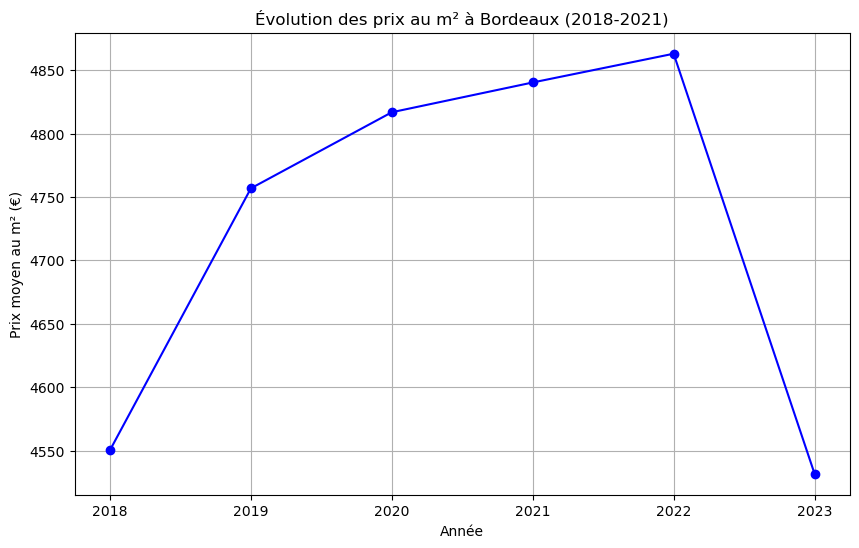

Prix moyen au m² par année :
properties.anneemut
2018    4550.334123
2019    4756.777894
2020    4816.763289
2021    4840.248122
2022    4862.917694
2023    4531.713113
Name: prix_m2, dtype: float64


In [38]:
import matplotlib.pyplot as plt

# Calculer le prix moyen au m² par année
prix_par_annee = dvf_data_prepared.groupby("properties.anneemut")["prix_m2"].mean()

# Visualiser l'évolution des prix
plt.figure(figsize=(10, 6))
prix_par_annee.plot(kind="line", marker="o", color="b")
plt.title("Évolution des prix au m² à Bordeaux (2018-2021)")
plt.xlabel("Année")
plt.ylabel("Prix moyen au m² (€)")
plt.grid()
plt.show()

# Afficher les résultats sous forme de tableau
print("Prix moyen au m² par année :")
print(prix_par_annee)


On fait le même graphique en séparant par type de bien

<Figure size 1000x600 with 0 Axes>

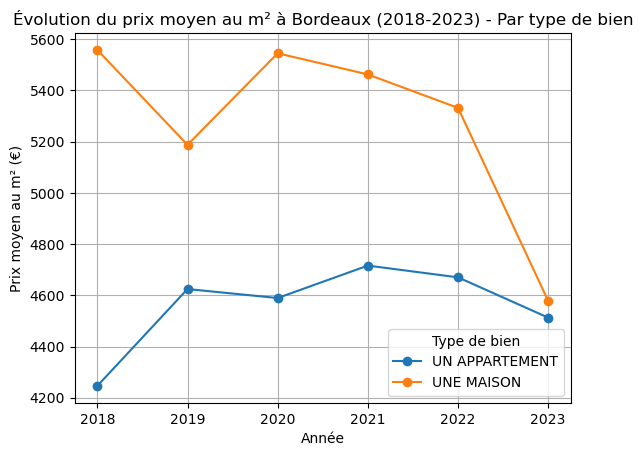

Prix moyen au m² par année et par type de bien :
properties.libtypbien  UN APPARTEMENT   UNE MAISON
properties.anneemut                               
2018                      4246.208133  5557.751464
2019                      4624.315115  5187.281926
2020                      4589.302517  5544.637762
2021                      4715.878054  5462.098466
2022                      4669.995289  5331.443532
2023                      4512.568616  4577.659906


In [50]:
# Calculer le prix moyen au m² par année et par type de bien
prix_par_type = dvf_data_prepared.groupby(["properties.anneemut", "properties.libtypbien"])["prix_m2"].mean().unstack()

# Visualiser l'évolution des prix par type de bien
plt.figure(figsize=(10, 6))
prix_par_type.plot(kind="line", marker="o")
plt.title("Évolution du prix moyen au m² à Bordeaux (2018-2023) - Par type de bien")
plt.xlabel("Année")
plt.ylabel("Prix moyen au m² (€)")
plt.legend(title="Type de bien")
plt.grid()
plt.show()

# Afficher les résultats sous forme de tableau
print("Prix moyen au m² par année et par type de bien :")
print(prix_par_type)


Le prix baisse direct après l'application de la loi. 

In [42]:
# Séparer les données avant et après 2022 pour chaque type de bien
avant_2022_appart = dvf_data_prepared[
    (dvf_data_prepared["properties.anneemut"] < 2022) & (dvf_data_prepared["properties.libtypbien"] == "UN APPARTEMENT")
]
avant_2022_maison = dvf_data_prepared[
    (dvf_data_prepared["properties.anneemut"] < 2022) & (dvf_data_prepared["properties.libtypbien"] == "UNE MAISON")
]
apres_2022_appart = dvf_data_prepared[
    (dvf_data_prepared["properties.anneemut"] >= 2022) & (dvf_data_prepared["properties.libtypbien"] == "UN APPARTEMENT")
]
apres_2022_maison = dvf_data_prepared[
    (dvf_data_prepared["properties.anneemut"] >= 2022) & (dvf_data_prepared["properties.libtypbien"] == "UNE MAISON")
]

# Calculer les moyennes
prix_avant_appart = avant_2022_appart["prix_m2"].mean()
prix_apres_appart = apres_2022_appart["prix_m2"].mean()
prix_avant_maison = avant_2022_maison["prix_m2"].mean()
prix_apres_maison = apres_2022_maison["prix_m2"].mean()

print(f"Appartements - Prix moyen au m² avant 2022 : {prix_avant_appart:.2f} €")
print(f"Appartements - Prix moyen au m² après 2022 : {prix_apres_appart:.2f} €")
print(f"Maisons - Prix moyen au m² avant 2022 : {prix_avant_maison:.2f} €")
print(f"Maisons - Prix moyen au m² après 2022 : {prix_apres_maison:.2f} €")

# Calculer les volumes de transactions
volume_avant_appart = len(avant_2022_appart)
volume_apres_appart = len(apres_2022_appart)
volume_avant_maison = len(avant_2022_maison)
volume_apres_maison = len(apres_2022_maison)

print(f"Appartements - Nombre de transactions avant 2022 : {volume_avant_appart}")
print(f"Appartements - Nombre de transactions après 2022 : {volume_apres_appart}")
print(f"Maisons - Nombre de transactions avant 2022 : {volume_avant_maison}")
print(f"Maisons - Nombre de transactions après 2022 : {volume_apres_maison}")


Appartements - Prix moyen au m² avant 2022 : 4548.13 €
Appartements - Prix moyen au m² après 2022 : 4593.67 €
Maisons - Prix moyen au m² avant 2022 : 5434.50 €
Maisons - Prix moyen au m² après 2022 : 4963.74 €
Appartements - Nombre de transactions avant 2022 : 213
Appartements - Nombre de transactions après 2022 : 99
Maisons - Nombre de transactions avant 2022 : 59
Maisons - Nombre de transactions après 2022 : 41


<Figure size 1200x600 with 0 Axes>

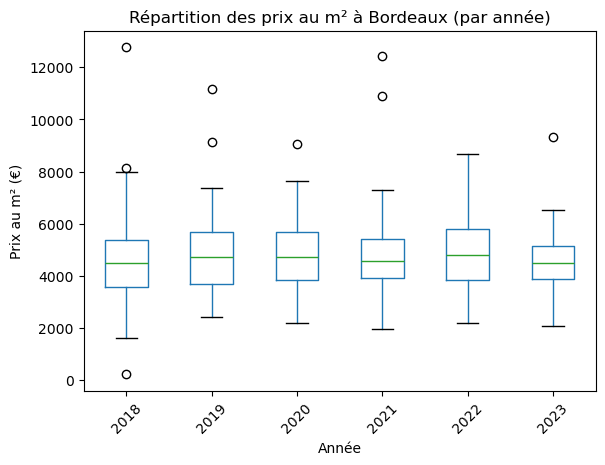

In [46]:
import matplotlib.pyplot as plt

# Créer un graphique de boîtes à moustaches pour les prix au m² par année
plt.figure(figsize=(12, 6))
dvf_data_prepared.boxplot(column="prix_m2", by="properties.anneemut", grid=False, showfliers=True)
plt.title("Répartition des prix au m² à Bordeaux (par année)")
plt.suptitle("")  # Supprimer le titre automatique
plt.xlabel("Année")
plt.ylabel("Prix au m² (€)")
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

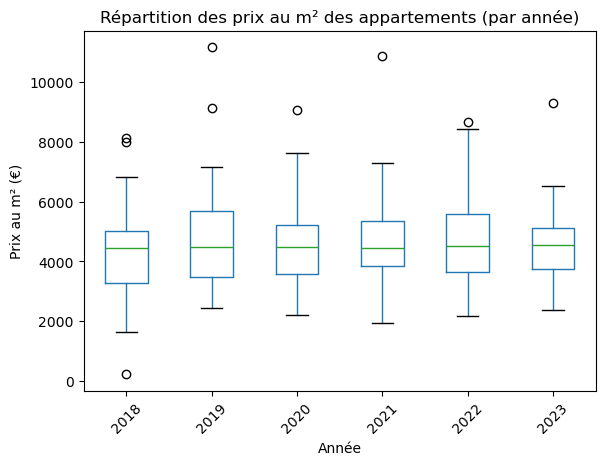

<Figure size 1200x600 with 0 Axes>

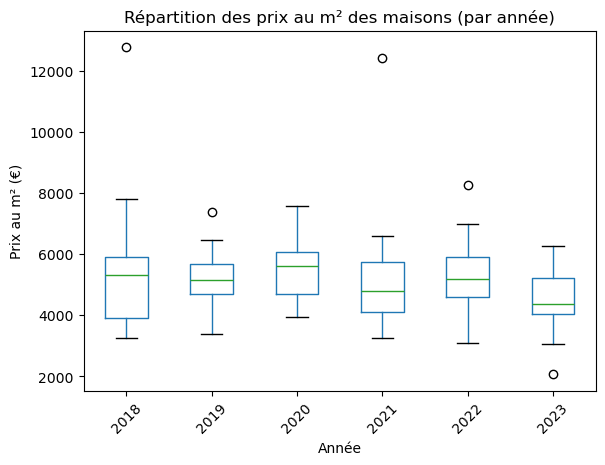

In [47]:
# Filtrer les données pour les appartements
appartements = dvf_data_prepared[dvf_data_prepared["properties.libtypbien"] == "UN APPARTEMENT"]

# Créer un boxplot pour les appartements
plt.figure(figsize=(12, 6))
appartements.boxplot(column="prix_m2", by="properties.anneemut", grid=False, showfliers=True)
plt.title("Répartition des prix au m² des appartements (par année)")
plt.suptitle("")  # Supprimer le titre automatique
plt.xlabel("Année")
plt.ylabel("Prix au m² (€)")
plt.xticks(rotation=45)
plt.show()

# Filtrer les données pour les maisons
maisons = dvf_data_prepared[dvf_data_prepared["properties.libtypbien"] == "UNE MAISON"]

# Créer un boxplot pour les maisons
plt.figure(figsize=(12, 6))
maisons.boxplot(column="prix_m2", by="properties.anneemut", grid=False, showfliers=True)
plt.title("Répartition des prix au m² des maisons (par année)")
plt.suptitle("")  # Supprimer le titre automatique
plt.xlabel("Année")
plt.ylabel("Prix au m² (€)")
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

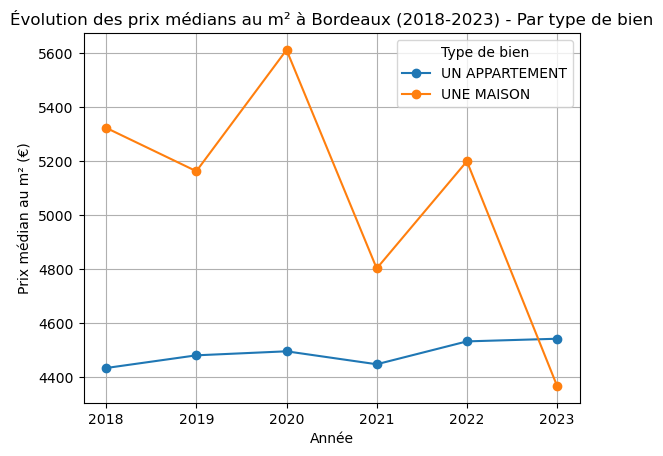

Prix médian au m² par année et par type de bien :
properties.libtypbien  UN APPARTEMENT   UNE MAISON
properties.anneemut                               
2018                      4434.782609  5323.717949
2019                      4481.723485  5163.246351
2020                      4496.599206  5612.244898
2021                      4448.669357  4803.340776
2022                      4533.333333  5200.000000
2023                      4543.141026  4368.466899


In [51]:
# Calculer le prix médian au m² par année et par type de bien
prix_median_par_type = dvf_data_prepared.groupby(["properties.anneemut", "properties.libtypbien"])["prix_m2"].median().unstack()

# Visualiser l'évolution des prix médians par type de bien
plt.figure(figsize=(10, 6))
prix_median_par_type.plot(kind="line", marker="o")
plt.title("Évolution des prix médians au m² à Bordeaux (2018-2023) - Par type de bien")
plt.xlabel("Année")
plt.ylabel("Prix médian au m² (€)")
plt.legend(title="Type de bien")
plt.grid()
plt.show()

# Afficher les résultats sous forme de tableau
print("Prix médian au m² par année et par type de bien :")
print(prix_median_par_type)


In [55]:
# Charger les données DVF pour Lille (code INSEE : 59350)
data_frames_lille = []
for year in [2018, 2019, 2020, 2021, 2022, 2023]:
    print(f"Récupération des données pour Lille, année {year}...")
    df = importation_donnees_api(year, "59350")  # Lyon
    if df is not None:
        df["properties.anneemut"] = year  # Ajouter l'année comme colonne
        data_frames_lille.append(df)

# Combiner toutes les années en un seul DataFrame
dvf_data_lille = pd.concat(data_frames_lille, ignore_index=True)

# Préparer les données pour Lyon
dvf_data_prepared_lille= prepare_data(dvf_data_lille)

# Vérifier les données pour Lyon
print("Données DVF pour Lille prêtes :")
print(dvf_data_prepared_lille.head())


Récupération des données pour Lille, année 2018...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Lille, année 2019...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Lille, année 2020...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Lille, année 2021...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Lille, année 2022...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Lille, année 2023...
Coordonnées géographiques absentes dans les données.
Données DVF pour Lille prêtes :
        id     type geometry.type  \
2  8438317  Feature  MultiPolygon   
3  8438323  Feature  MultiPolygon   
4  8438337  Feature  MultiPolygon   
5  8438381  Feature  MultiPolygon   
6  8438382  Feature  MultiPolygon   

                                geometry.coordinates  \
2  [[[[3.052025, 50.630617], [3.051889, 50.630749...   
3  [[[[3.

/tmp/ipykernel_79947/1609081049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["properties.valeurfonc"] = pd.to_numeric(data["properties.valeurfonc"], errors="coerce")
/tmp/ipykernel_79947/1609081049.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["properties.sbati"] = pd.to_numeric(data["properties.sbati"], errors="coerce")


<Figure size 1200x600 with 0 Axes>

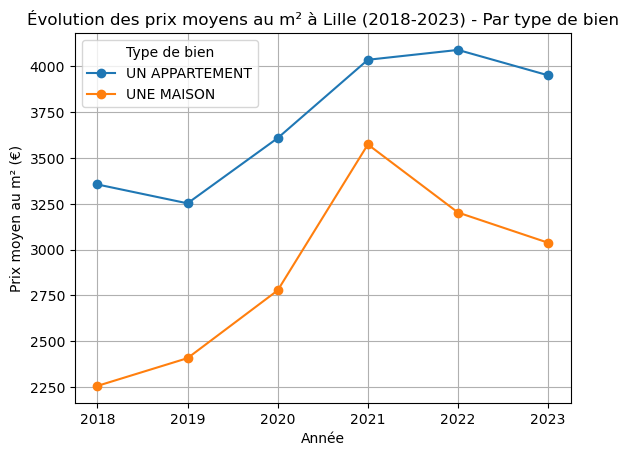

In [57]:
prix_moyen_lille = dvf_data_prepared_lille.groupby(["properties.anneemut", "properties.libtypbien"])["prix_m2"].mean().unstack()

# Visualiser l'évolution des prix moyens au m² pour Lille
plt.figure(figsize=(12, 6))
prix_moyen_lille.plot(kind="line", marker="o")
plt.title("Évolution des prix moyens au m² à Lille (2018-2023) - Par type de bien")
plt.xlabel("Année")
plt.ylabel("Prix moyen au m² (€)")
plt.legend(title="Type de bien")
plt.grid()
plt.show()

<Figure size 1200x600 with 0 Axes>

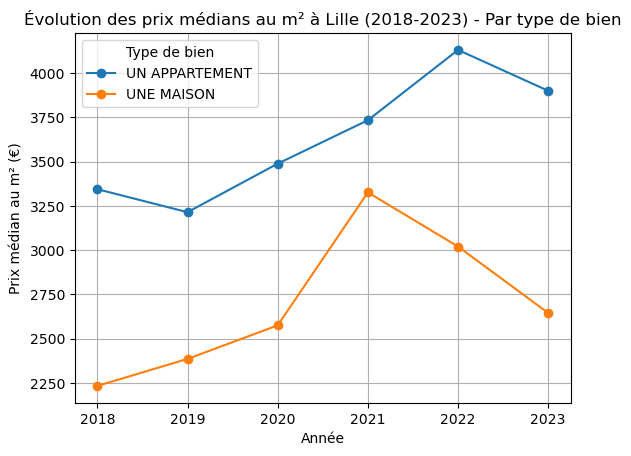

Prix médians au m² - Lille :
properties.libtypbien  UN APPARTEMENT   UNE MAISON
properties.anneemut                               
2018                      3344.279661  2232.812500
2019                      3214.285714  2385.375494
2020                      3488.372093  2575.000000
2021                      3733.750000  3326.018359
2022                      4130.970893  3020.202020
2023                      3900.000000  2644.625640


In [58]:
# Calculer les prix médians au m² par année et par type de bien pour Lille
prix_median_lille = dvf_data_prepared_lille.groupby(["properties.anneemut", "properties.libtypbien"])["prix_m2"].median().unstack()

# Visualiser l'évolution des prix médians au m² pour Lille
plt.figure(figsize=(12, 6))
prix_median_lille.plot(kind="line", marker="o")
plt.title("Évolution des prix médians au m² à Lille (2018-2023) - Par type de bien")
plt.xlabel("Année")
plt.ylabel("Prix médian au m² (€)")
plt.legend(title="Type de bien")
plt.grid()
plt.show()

# Afficher les résultats sous forme de tableau
print("Prix médians au m² - Lille :")
print(prix_median_lille)


In [61]:
# Charger les données DVF pour Toulouse (code INSEE : 31555)
data_frames_toulouse = []
for year in [2018, 2019, 2020, 2021, 2022, 2023]:
    print(f"Récupération des données pour Toulouse, année {year}...")
    df = importation_donnees_api(year, "31555")  # Toulouse
    if df is not None:
        df["properties.anneemut"] = year  # Ajouter l'année comme colonne
        data_frames_toulouse.append(df)

# Combiner toutes les années en un seul DataFrame
dvf_data_toulouse = pd.concat(data_frames_toulouse, ignore_index=True)

# Préparer les données pour Toulouse
dvf_data_prepared_toulouse = prepare_data(dvf_data_toulouse)

# Vérifier les données pour Toulouse
print("Données DVF pour Toulouse prêtes :")
print(dvf_data_prepared_toulouse.head())


Récupération des données pour Toulouse, année 2018...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Toulouse, année 2019...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Toulouse, année 2020...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Toulouse, année 2021...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Toulouse, année 2022...
Coordonnées géographiques absentes dans les données.
Récupération des données pour Toulouse, année 2023...
Coordonnées géographiques absentes dans les données.
Données DVF pour Toulouse prêtes :
        id     type geometry.type  \
0  4081950  Feature  MultiPolygon   
1  4081952  Feature  MultiPolygon   
2  4081953  Feature  MultiPolygon   
6  4081962  Feature  MultiPolygon   
7  4081963  Feature  MultiPolygon   

                                geometry.coordinates  \
0  [[[[1.422404, 43.589656], [1.422441, 43.5

/tmp/ipykernel_79947/1609081049.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["properties.valeurfonc"] = pd.to_numeric(data["properties.valeurfonc"], errors="coerce")
/tmp/ipykernel_79947/1609081049.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["properties.sbati"] = pd.to_numeric(data["properties.sbati"], errors="coerce")


<Figure size 1200x600 with 0 Axes>

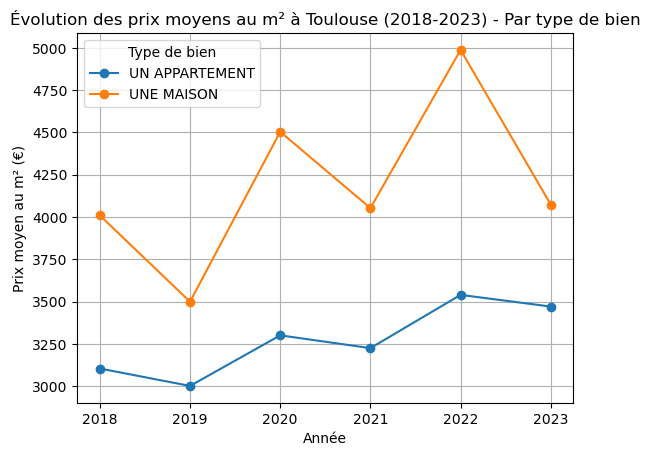

Prix moyens au m² - Toulouse :
properties.libtypbien  UN APPARTEMENT   UNE MAISON
properties.anneemut                               
2018                      3105.182954  4009.467999
2019                      3002.334247  3499.900376
2020                      3301.233921  4503.952827
2021                      3225.589908  4052.890407
2022                      3540.217533  4987.623761
2023                      3471.238284  4073.970660


In [62]:
# Calculer les prix moyens au m² par année et par type de bien pour Toulouse
prix_moyen_toulouse = dvf_data_prepared_toulouse.groupby(["properties.anneemut", "properties.libtypbien"])["prix_m2"].mean().unstack()

# Visualiser l'évolution des prix moyens au m² pour Toulouse
plt.figure(figsize=(12, 6))
prix_moyen_toulouse.plot(kind="line", marker="o")
plt.title("Évolution des prix moyens au m² à Toulouse (2018-2023) - Par type de bien")
plt.xlabel("Année")
plt.ylabel("Prix moyen au m² (€)")
plt.legend(title="Type de bien")
plt.grid()
plt.show()

# Afficher les résultats sous forme de tableau
print("Prix moyens au m² - Toulouse :")
print(prix_moyen_toulouse)


<Figure size 1200x600 with 0 Axes>

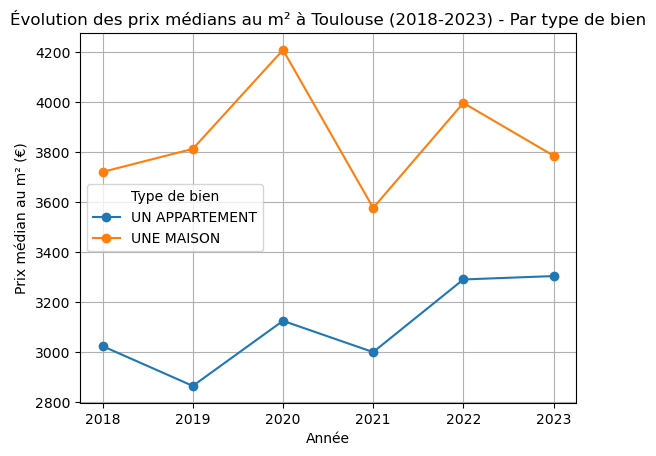

Prix médians au m² - Toulouse :
properties.libtypbien  UN APPARTEMENT   UNE MAISON
properties.anneemut                               
2018                      3023.872180  3720.050029
2019                      2864.864865  3812.030075
2020                      3125.000000  4207.500000
2021                      3000.000000  3576.288660
2022                      3290.256410  3995.631313
2023                      3303.827751  3784.946237


In [63]:
# Calculer les prix médians au m² par année et par type de bien pour Toulouse
prix_median_toulouse = dvf_data_prepared_toulouse.groupby(["properties.anneemut", "properties.libtypbien"])["prix_m2"].median().unstack()

# Visualiser l'évolution des prix médians au m² pour Toulouse
plt.figure(figsize=(12, 6))
prix_median_toulouse.plot(kind="line", marker="o")
plt.title("Évolution des prix médians au m² à Toulouse (2018-2023) - Par type de bien")
plt.xlabel("Année")
plt.ylabel("Prix médian au m² (€)")
plt.legend(title="Type de bien")
plt.grid()
plt.show()

# Afficher les résultats sous forme de tableau
print("Prix médians au m² - Toulouse :")
print(prix_median_toulouse)
